In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [2]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [3]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [4]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF unigram(1,1)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,1), max_df=0.7, max_features=15000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [26]:
#Split data 90% data train and 10% data test
x_unigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_unigram,label, test_size = 0.1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45470, 3445) (45470,)
(5053, 3445) (5053,)


In [27]:
y_train

22420    1
34732    1
35862    0
12680    1
25098    0
        ..
37017    1
44696    1
28623    1
9861     0
5998     1
Name: Label, Length: 45470, dtype: int64

In [28]:
x_train

0     1         2     3     4         5     6     7     8     9     \
22420   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
34732   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
35862   0.0   0.0  0.000000   0.0   0.0  0.338403   0.0   0.0   0.0   0.0   
12680   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
25098   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
...     ...   ...       ...   ...   ...       ...   ...   ...   ...   ...   
37017   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
44696   0.0   0.0  0.040586   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
28623   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
9861    0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
5998    0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   

       ...  3435  3436  3437  3438  3439  3440  3441  3442  3443  3444  
22420  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
34732  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
35862  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12680  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
25098  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
37017  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
44696  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
28623  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9861   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5998   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[45470 rows x 3445 columns]

In [29]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [30]:
x_train.shape

(45470, 1, 3445)

In [31]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_4                  │ (None, 1, 3445)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │       1,829,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7299 - loss: 0.5013 - val_accuracy: 0.8256 - val_loss: 0.3667
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8105 - loss: 0.3835 - val_accuracy: 0.8251 - val_loss: 0.3525
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8164 - loss: 0.3698 - val_accuracy: 0.8340 - val_loss: 0.3454
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8237 - loss: 0.3584 - val_accuracy: 0.8334 - val_loss: 0.3429
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8270 - loss: 0.3526 - val_accuracy: 0.8353 - val_loss: 0.3402
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8314 - loss: 0.3428 - val_accuracy: 0.8355 - val_loss: 0.3419
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8345 - loss: 0.3399 - val_accuracy: 0.8381 - val_loss: 0.3412
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8355 - loss: 0.3

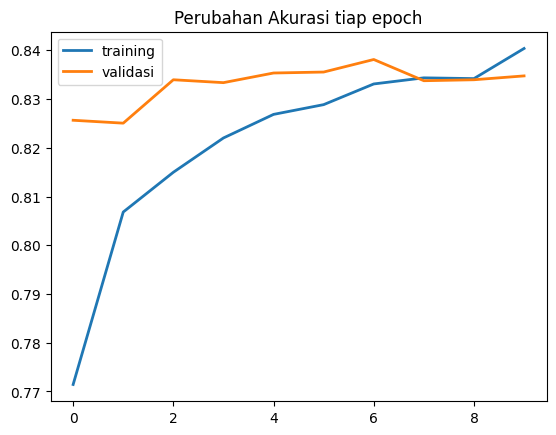

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.841365  0.826430  0.833831      2535
           1   0.828326  0.843129  0.835662      2518

    accuracy                       0.834752      5053
   macro avg   0.834846  0.834780  0.834747      5053
weighted avg   0.834868  0.834752  0.834743      5053



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_5                  │ (None, 1, 3445)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │       1,829,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7383 - loss: 0.5000 - val_accuracy: 0.8205 - val_loss: 0.3673
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8102 - loss: 0.3840 - val_accuracy: 0.8175 - val_loss: 0.3597
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8140 - loss: 0.3726 - val_accuracy: 0.8290 - val_loss: 0.3508
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8173 - loss: 0.3645 - val_accuracy: 0.8292 - val_loss: 0.3453
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8246 - loss: 0.3537 - val_accuracy: 0.8351 - val_loss: 0.3427
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8306 - loss: 0.3443 - val_accuracy: 0.8344 - val_loss: 0.3414
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8347 - loss: 0.3381 - val_accuracy: 0.8328 - val_loss: 0.3413
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8325 - loss: 0.3

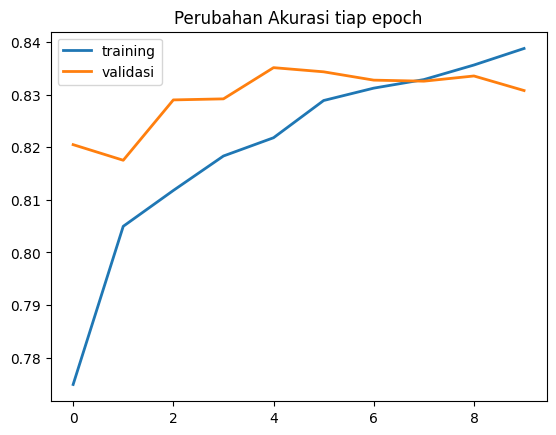

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.853833  0.799606  0.825830      2535
           1   0.810377  0.862192  0.835482      2518

    accuracy                       0.830794      5053
   macro avg   0.832105  0.830899  0.830656      5053
weighted avg   0.832178  0.830794  0.830640      5053



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_6                  │ (None, 1, 3445)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 128)                 │       1,829,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7538 - loss: 0.4987 - val_accuracy: 0.8205 - val_loss: 0.3658
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8018 - loss: 0.3936 - val_accuracy: 0.8239 - val_loss: 0.3573
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8115 - loss: 0.3728 - val_accuracy: 0.8312 - val_loss: 0.3520
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8224 - loss: 0.3616 - val_accuracy: 0.8314 - val_loss: 0.3447
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8251 - loss: 0.3527 - val_accuracy: 0.8322 - val_loss: 0.3414
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8297 - loss: 0.3439 - val_accuracy: 0.8359 - val_loss: 0.3404
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8317 - loss: 0.3429 - val_accuracy: 0.8334 - val_loss: 0.3381
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8349 - loss: 0.3

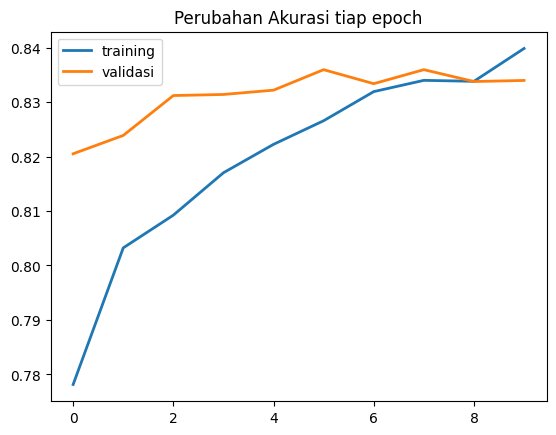

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.855109  0.805523  0.829575      2535
           1   0.815009  0.862589  0.838125      2518

    accuracy                       0.833960      5053
   macro avg   0.835059  0.834056  0.833850      5053
weighted avg   0.835127  0.833960  0.833836      5053



In [33]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [34]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.8331684148030872
Average Precision : 0.8179041891554005
Average Recall    : 0.8559703468361133
Average F1-Score  : 0.836422972766039
